# Absorption Ratio

Diego Alvarez (diego.alvarez@colorado.edu)

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from DataSource import DataCollect
from AbsorptionRatio import AbsorptionRatio

## Get Data

In [5]:
def prep_data() -> pd.DataFrame:
    
    df_prep = (DataCollect().get_spx_names().query(
        "variable_0 == 'Adj Close'").
        drop(columns = ["variable_0"]).
        pivot(index = "Date", columns = "variable_1", values = "value").
        pct_change().
        fillna(0))
    
    return df_prep

df_prep = prep_data()

found data


In this case we are going to use $n$ components that is 20% of our features (100). The absorption ratio is the measure of the cumulative $n$ PC's variance divided by the cumulative variance of the total dataset. In this case we'll use a lookback window of ssize 500.
\begin{equation}
AR = \frac{\sum_{i = 1}^n \sigma_{E,i}^2}{\sum_{j = 1}^N \sigma_{A,j}^2}
\end{equation}

In [21]:
def get_absorption(df_prep: pd.DataFrame) -> pd.DataFrame: 
    
    path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), "data", "absorption_ratio.parquet")

    try:

        df_absorption = pd.read_parquet(path = path, engine = "pyarrow")

    except: 

        n_components = int(len(df_prep.columns) * 0.2)
        df_absorption = AbsorptionRatio().get_absorption_ratio(df_prep, n_components = n_components)
        df_absorption.to_parquet(path = path, engine = "pyarrow")
        
    return df_absorption

df_absorption = get_absorption(df_prep)

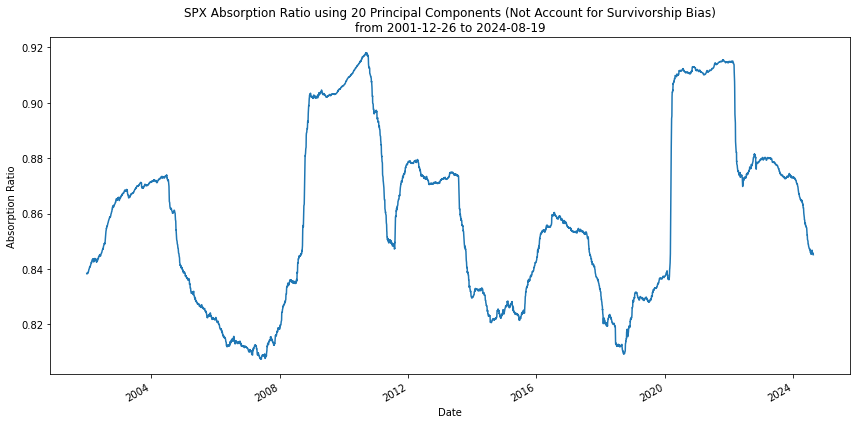

In [30]:
def plot_absorption_ratio(df_absorption: pd.DataFrame) -> plt.Figure: 

    df_absorption.set_index("Date").plot(
        figsize = (12,6),
        ylabel = "Absorption Ratio",
        legend = False,
        title = "SPX Absorption Ratio using 20 Principal Components (Not Account for Survivorship Bias)\nfrom {} to {}".format(
            df_absorption.Date.min().date(),
            df_absorption.Date.max().date()))
    
    plt.tight_layout()
    
plot_absorption_ratio(df_absorption)